In [ ]:
#(0, 0, 'CIFTI_STRUCTURE_CORTEX_LEFT')
#(1, 29696, 'CIFTI_STRUCTURE_CORTEX_RIGHT')
#(2, 59412, 'CIFTI_STRUCTURE_ACCUMBENS_LEFT')
#(3, 59547, 'CIFTI_STRUCTURE_ACCUMBENS_RIGHT')
#(4, 59687, 'CIFTI_STRUCTURE_AMYGDALA_LEFT')
#(5, 60002, 'CIFTI_STRUCTURE_AMYGDALA_RIGHT')
#(6, 60334, 'CIFTI_STRUCTURE_BRAIN_STEM')
#(7, 63806, 'CIFTI_STRUCTURE_CAUDATE_LEFT')
#(8, 64534, 'CIFTI_STRUCTURE_CAUDATE_RIGHT')
#(9, 65289, 'CIFTI_STRUCTURE_CEREBELLUM_LEFT')
#(10, 73998, 'CIFTI_STRUCTURE_CEREBELLUM_RIGHT')
#(11, 83142, 'CIFTI_STRUCTURE_DIENCEPHALON_VENTRAL_LEFT')
#(12, 83848, 'CIFTI_STRUCTURE_DIENCEPHALON_VENTRAL_RIGHT')
#(13, 84560, 'CIFTI_STRUCTURE_HIPPOCAMPUS_LEFT')
#(14, 85324, 'CIFTI_STRUCTURE_HIPPOCAMPUS_RIGHT')
#(15, 86119, 'CIFTI_STRUCTURE_PALLIDUM_LEFT')
#(16, 86416, 'CIFTI_STRUCTURE_PALLIDUM_RIGHT')
#(17, 86676, 'CIFTI_STRUCTURE_PUTAMEN_LEFT')
#(18, 87736, 'CIFTI_STRUCTURE_PUTAMEN_RIGHT')
#(19, 88746, 'CIFTI_STRUCTURE_THALAMUS_LEFT')
#(20, 90034, 'CIFTI_STRUCTURE_THALAMUS_RIGHT')

In [1]:
import os, glob, nibabel as nib, subprocess, numpy as np, matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, nilearn
import matplotlib.cm as cm, seaborn as sns, matplotlib
from nilearn import plotting
import subprocess, numpy as np, nibabel as nib
from sklearn.metrics import pairwise_distances
import sys
from PIL import Image
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
cd /mnt/c/Users/xavie/Dropbox\ \(MIT\)/MIT/_ACTIVE_PROJECTS/homotopy/laterality_index

/mnt/c/Users/xavie/Dropbox (MIT)/MIT/_ACTIVE_PROJECTS/homotopy/laterality_index


In [3]:
dcon = nib.load('/mnt/c/Users/xavie/Desktop/HCP_S1200_1003_rfMRI_MSMAll_groupPCA_d4500ROW_zcorr.dconn.nii').get_data()
caudategradients = nib.load('result_caudatebilateral.dscalar.nii').get_data()
cerebellumgradients = nib.load('result_fromcerebellumtocerebellum.dscalar.nii').get_data()
lenticulargradients = nib.load('result_pallidumandputamen.dscalar.nii').get_data()
thalamusgradients = nib.load('result_thalamus_bilateral.dscalar.nii').get_data()
cerebralcortexgradients = nib.load('result_fromcortextocortex_gradients_moregradients.dscalar.nii').get_data()

/usr/local/lib/python3.5/dist-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/home/xavierguell/.local/lib/python3.5/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)


In [5]:
thalamusgradients.shape

(1, 1, 1, 1, 14, 2536)

In [6]:
cerebralcortexgradients.shape

(1096, 59412)

In [8]:
thalamus_grad1 = thalamusgradients[0,0,0,0,0,:].copy()

In [7]:
cerebralcortex_grad1 = cerebralcortexgradients[0,:].copy()

In [21]:
## HEREHERE RUN FROM HERE

dcon_cerebralcortex = dcon[:59412, :59412].copy()
cerebralcortex_grad1 = cerebralcortexgradients[0,:].copy()
# left cerebralcortex is the first 29696 of these 2536
dcon_cerebralcortex.shape

(59412, 59412)

In [22]:
cd /mnt/c/Users/xavie/Dropbox\ \(MIT\)/MIT/_ACTIVE_PROJECTS/homotopy/projecting_to_cerebralcortex

/mnt/c/Users/xavie/Dropbox (MIT)/MIT/_ACTIVE_PROJECTS/homotopy/projecting_to_cerebralcortex


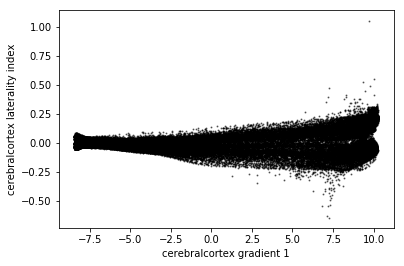

In [23]:
left_value_each_voxel_cerebralcortex = {}
i=0
for row in dcon_cerebralcortex[:29696]:
    left_value_each_voxel_cerebralcortex[i] = row
    i=i+1
    
left_value_each_voxel_cerebralcortex_df = pd.DataFrame.from_dict(left_value_each_voxel_cerebralcortex)
# transform to absolute values
left_value_each_voxel_cerebralcortex_df_abs = left_value_each_voxel_cerebralcortex_df
# add all values in a new column
left_value_each_voxel_cerebralcortex_df_abs['left_added'] = left_value_each_voxel_cerebralcortex_df_abs.sum(axis=1)

right_value_each_voxel_cerebralcortex = {}
i=0
for row in dcon_cerebralcortex[29696:]:
    right_value_each_voxel_cerebralcortex[i] = row
    i=i+1
    
right_value_each_voxel_cerebralcortex_df = pd.DataFrame.from_dict(right_value_each_voxel_cerebralcortex)
# transform to absolute values
right_value_each_voxel_cerebralcortex_df_abs = right_value_each_voxel_cerebralcortex_df
# add all values in a new column
right_value_each_voxel_cerebralcortex_df_abs['right_added'] = right_value_each_voxel_cerebralcortex_df_abs.sum(axis=1)

cerebralcortex_rightscores = np.array(right_value_each_voxel_cerebralcortex_df_abs['right_added'])
cerebralcortex_leftscores = np.array(left_value_each_voxel_cerebralcortex_df_abs['left_added'])

cerebralcortex_scores = (cerebralcortex_leftscores - cerebralcortex_rightscores) / ((cerebralcortex_leftscores + cerebralcortex_rightscores))

plt.scatter(cerebralcortex_grad1, cerebralcortex_scores, alpha=0.5, s=1, c='k')
plt.xlabel('cerebralcortex gradient 1')
plt.ylabel('cerebralcortex laterality index')
plt.savefig('cerebralcortex_laterality_vs_grad1_PosNegNotAbs', dpi=600)

In [61]:
cerebellar_gradient3_projectedtocerebralcortex = nib.load('cerebellum_grad3_ProjectedToCerebralCortex_AbsoluteValues.dscalar.nii').get_data()[0,:]
caudate_gradient2_projectedtocerebralcortex = nib.load('caudate_grad2_ProjectedToCerebralCortex_AbsoluteValues.dscalar.nii').get_data()[0,:]
lenticular_gradient1_projectedtocerebralcortex = nib.load('lenticular_grad1_ProjectedToCerebralCortex_AbsoluteValues.dscalar.nii').get_data()[0,:]
thalamus_gradient1_projectedtocerebralcortex = nib.load('thalamus_grad1_ProjectedToCerebralCortex_AbsoluteValues.dscalar.nii').get_data()[0,:]
cerebralcortex_grad1 = cerebralcortexgradients[0,:].copy()


/usr/local/lib/python3.5/dist-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/home/xavierguell/.local/lib/python3.5/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)


{'boxes': [<matplotlib.lines.Line2D at 0x7f12b377c2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f12b377cd68>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f12b3782ac8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f12b3782668>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f12b377c400>,
  <matplotlib.lines.Line2D at 0x7f12b379e668>]}

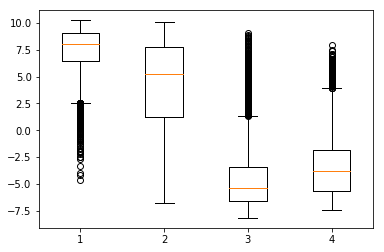

In [39]:
thalamus = cerebralcortex_grad1[thalamus_gradient1_projectedtocerebralcortex>np.percentile(thalamus_gradient1_projectedtocerebralcortex, 90)]
cerebellum = cerebralcortex_grad1[cerebellar_gradient3_projectedtocerebralcortex>np.percentile(cerebellar_gradient3_projectedtocerebralcortex, 90)]
lenticular = cerebralcortex_grad1[lenticular_gradient1_projectedtocerebralcortex>np.percentile(lenticular_gradient1_projectedtocerebralcortex, 90)]
caudate = cerebralcortex_grad1[caudate_gradient2_projectedtocerebralcortex>np.percentile(caudate_gradient2_projectedtocerebralcortex, 90)]

plt.boxplot([cerebellum, caudate, thalamus, lenticular])

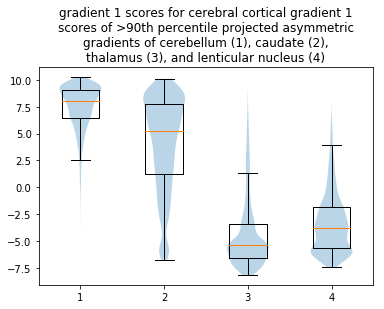

In [87]:
thalamus = cerebralcortex_grad1[thalamus_gradient1_projectedtocerebralcortex>np.percentile(thalamus_gradient1_projectedtocerebralcortex, 90)]
cerebellum = cerebralcortex_grad1[cerebellar_gradient3_projectedtocerebralcortex>np.percentile(cerebellar_gradient3_projectedtocerebralcortex, 90)]
lenticular = cerebralcortex_grad1[lenticular_gradient1_projectedtocerebralcortex>np.percentile(lenticular_gradient1_projectedtocerebralcortex, 90)]
caudate = cerebralcortex_grad1[caudate_gradient2_projectedtocerebralcortex>np.percentile(caudate_gradient2_projectedtocerebralcortex, 90)]

plt.violinplot([cerebellum, caudate, thalamus, lenticular], showextrema=False)
plt.boxplot([cerebellum, caudate, thalamus, lenticular], showfliers=False)
plt.title('gradient 1 scores for cerebral cortical gradient 1\nscores of >90th percentile projected asymmetric\ngradients of cerebellum (1), caudate (2),\nthalamus (3), and lenticular nucleus (4)')
plt.savefig('cerebralcortexgrad1scores_forProjectedAsymGradients', dpi=600, bbox_inches='tight')
# blue violinplot shows max and mean with its whiskers, while boxplot shows 1.5IQR


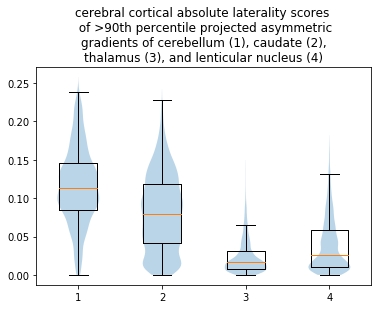

In [89]:
thalamus = np.absolute(cerebralcortex_scores[thalamus_gradient1_projectedtocerebralcortex>np.percentile(thalamus_gradient1_projectedtocerebralcortex, 90)])
cerebellum = np.absolute(cerebralcortex_scores[cerebellar_gradient3_projectedtocerebralcortex>np.percentile(cerebellar_gradient3_projectedtocerebralcortex, 90)])
lenticular = np.absolute(cerebralcortex_scores[lenticular_gradient1_projectedtocerebralcortex>np.percentile(lenticular_gradient1_projectedtocerebralcortex, 90)])
caudate = np.absolute(cerebralcortex_scores[caudate_gradient2_projectedtocerebralcortex>np.percentile(caudate_gradient2_projectedtocerebralcortex, 90)])

plt.violinplot([cerebellum, caudate, thalamus, lenticular], showextrema=False)
plt.boxplot([cerebellum, caudate, thalamus, lenticular], showfliers=False)
plt.title('cerebral cortical absolute laterality scores \n of >90th percentile projected asymmetric\ngradients of cerebellum (1), caudate (2),\nthalamus (3), and lenticular nucleus (4)')
plt.savefig('cerebralcortexlateralityscores_forProjectedAsymGradients', dpi=600, bbox_inches='tight')


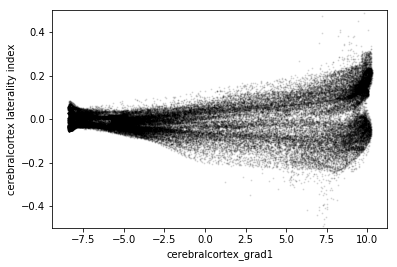

In [86]:
plt.scatter(cerebralcortex_grad1, cerebralcortex_scores, alpha=0.1, s=1, c='k')
plt.xlabel('cerebralcortex_grad1')
plt.ylabel('cerebralcortex laterality index')
plt.ylim(-0.5, 0.5)
plt.savefig('cerebralcortex_grad1_comparedtocerebralcortexlateralityscores', dpi=600)